#Assumptions

## 4 Core Assumptions of the General Linear Model (Linear Regression)

The General Linear Model (GLM) is defined by the equation: $y = \beta_0 + \beta_1 X + e$,

where $y$ is the dependent variable, $X$ is the independent variable, $\beta_0$ and $\beta_1$ are the coefficients, and $e$ is the error (residual) term. For the results (like the p-values and confidence intervals) derived from the model to be valid and reliable, the following four assumptions about the data and the residuals must be met.

### 1. Linearity of Relationship

* **Assumption:** There is a **linear relationship** between the independent variable ($X$) and the dependent variable ($y$).
* **Meaning:** The true relationship between $X$ and $y$ can be accurately modeled by a straight line. If the actual relationship is curve-shaped (e.g., quadratic or exponential), using a simple linear model will lead to inaccurate predictions and conclusions.

### 2. Normality of Residuals

* **Assumption:** The **residuals** (the error terms, $e$) are **normally distributed**.
* **Meaning:** If you were to collect all the differences between the observed data points and the regression line (the residuals), the distribution of these differences should form a bell-shaped curve (normal distribution). This assumption is crucial for performing hypothesis tests and calculating confidence intervals.

### 3. Homoscedasticity (Constant Variance of Residuals)

* **Assumption:** The **variance of the residuals is constant** across all levels of the independent variable ($X$).
* **Meaning:** The spread or scatter of the data points around the regression line should be roughly the same regardless of whether the $X$ value is small, medium, or large.
    * **Homoscedasticity** (constant variance) is desired.
    * **Heteroscedasticity** (changing variance, often funnel-shaped) violates this assumption and can make the model estimates inefficient.

### 4. Independence of Residuals

* **Assumption:** The **residuals are independent** of one another.
* **Meaning:** The error associated with one observation must not be correlated with the error associated with any other observation. This is often violated in **time series data** (where today's error might depend on yesterday's error—a condition called **autocorrelation**) or in **clustered data** (where observations within the same group are more similar).

##Considerations

When working with a General Linear Model, such as linear regression or ANOVA, it's essential to check the model's assumptions to ensure the results are reliable.

### 1. Focus on the Residuals

* **Primary Focus:** The core assumptions of the GLM (Normality, Homoscedasticity, Independence) are primarily about the **residuals** (errors), not the raw variables themselves.
    * **The Residuals** represent the unexplained variance after the model has accounted for the relationships between the variables. If the residuals behave well (i.e., meet the assumptions), the model is performing effectively.

### 2. Normality and Model Appropriateness

* **Normality Check:** If the **residuals are severely non-normal** (e.g., highly skewed), the statistical inferences (like p-values and confidence intervals) may be inaccurate.
* **Mean Dependence:** Most classical statistical tests, including ANOVA and linear regression, rely heavily on the **mean** to model the data and measure central tendency. If the distribution of the outcome variable (or the residuals) is highly skewed or bimodal, the mean may not be the best representation of the center, indicating that the **linear model may not be the most appropriate choice.**

### 3. Spread of the Error (Homoscedasticity)

* **Requirement:** The spread (variance) of the residuals must be **constant** across all levels of the predictor(s) or the fitted values. This is known as **homoscedasticity**.
* **Violation:** If the spread of the residuals increases or decreases as the predicted values increase (**heteroscedasticity**), it signals that the model's predictive accuracy varies systematically, leading to inefficient and potentially incorrect standard errors.

***

## Action Plan for Assumption Violations

If any assumptions are significantly violated, you should take corrective action:

1.  **Try to Fix the Data:**
    * Apply a **transformation** (e.g., log, square root, reciprocal) to the outcome variable (y) or the predictor variable (X) to improve linearity, normality, or homoscedasticity.
2.  **Choose an Appropriate Model:**
    * If transformations don't work, select a statistical method that does not rely on those specific assumptions. For example:
        * Use **non-parametric tests** (e.g., Kruskal-Wallis instead of ANOVA).
        * Use a **Generalized Linear Model (GLM)**, such as Poisson regression for count data or logistic regression for binary outcomes, which naturally handle non-normal error distributions.

## Linearity

In [ ]:
# create some data and train test split
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=1000, n_features=6, n_informative=3, effective_rank=3)
df = pd.DataFrame(data=X, columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
df['y'] = y

X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=.25, random_state=42)

In [ ]:
# check correlations
corrs = X_train.corrwith(y_train)
print(corrs.sort_values(ascending=False))
print(corrs.sort_values(ascending=False).index.tolist())

X6    0.703413
X2    0.476950
X4    0.156560
X3    0.040434
X1    0.001087
X5   -0.039387
dtype: float64
['X6', 'X2', 'X4', 'X3', 'X1', 'X5']


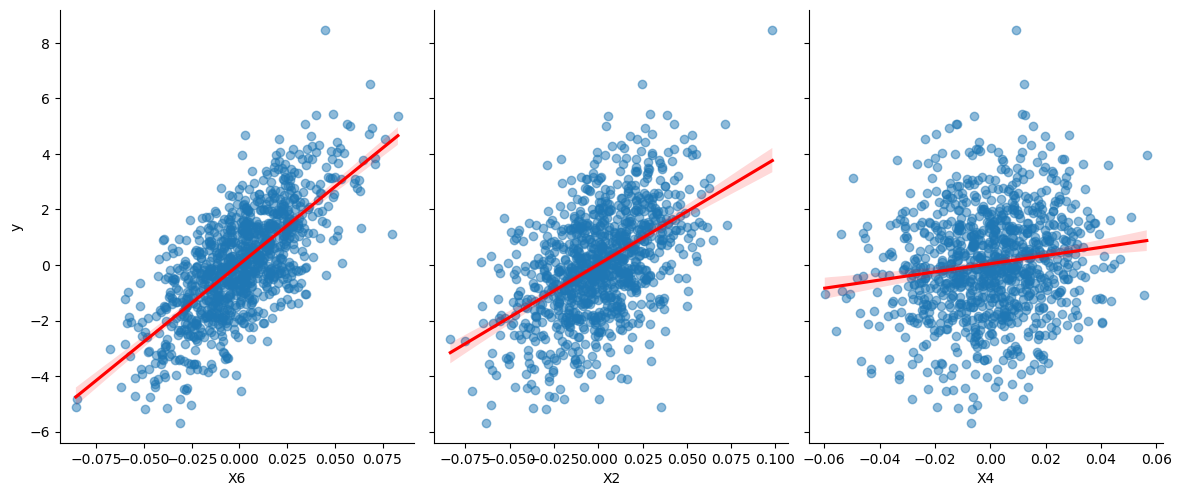

In [ ]:
# scatter plots showing correlation
# https://seaborn.pydata.org/tutorial/regression.html
import pandas as pd
import seaborn as sns


hi_X_corrs = corrs.sort_values(ascending=False).index.tolist()[0:3]
sns.pairplot(data=df, x_vars=hi_X_corrs, y_vars='y',
             kind='reg',
             height=5,
             aspect=0.8,
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}});

## Residuals

All models are wrong but some are useful. George Box

* y = Fit + Error

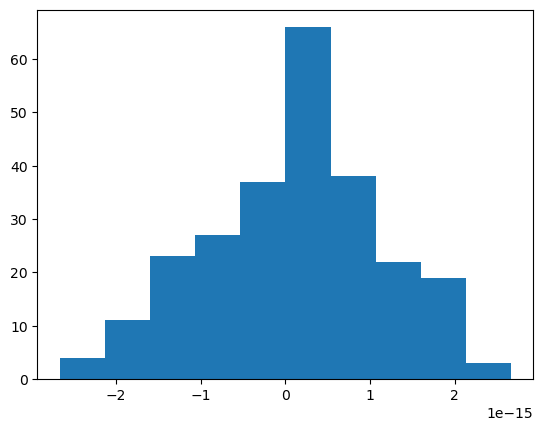

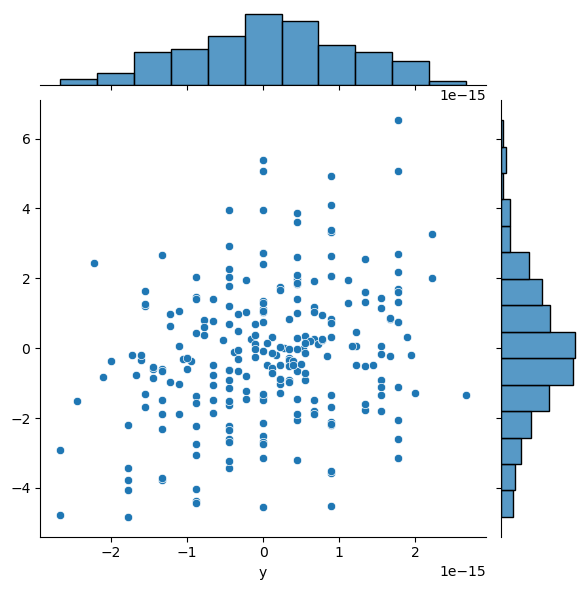

In [ ]:
# residuals plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
residuals = y_test - predictions
plt.hist(residuals);
sns.jointplot(x=residuals, y=predictions);

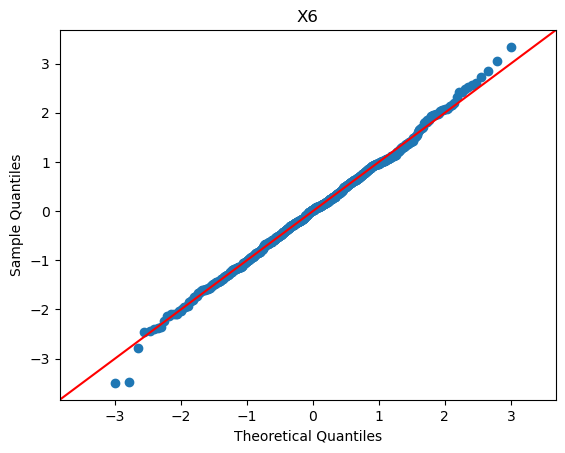

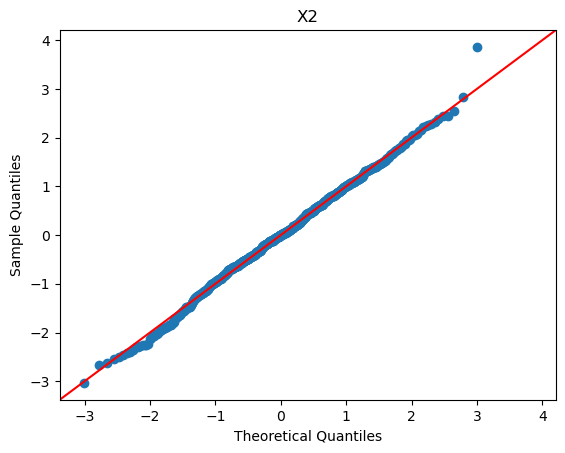

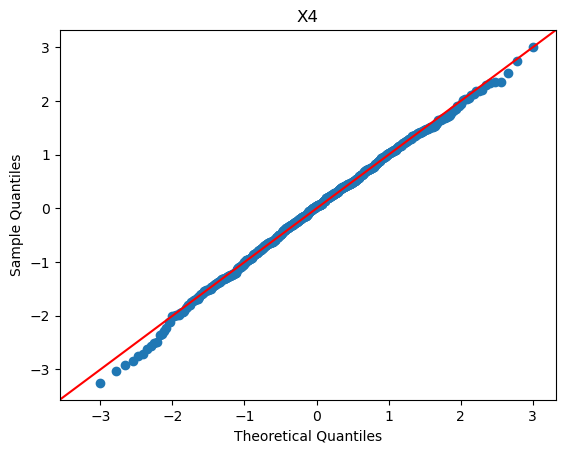

In [ ]:
# qqplot
import statsmodels.api as sm

for feat in hi_X_corrs:
    sm.qqplot(X_train[feat], line='45', fit=True)
    plt.title(feat)

## Multi-Collinearity and Homoscedasticity

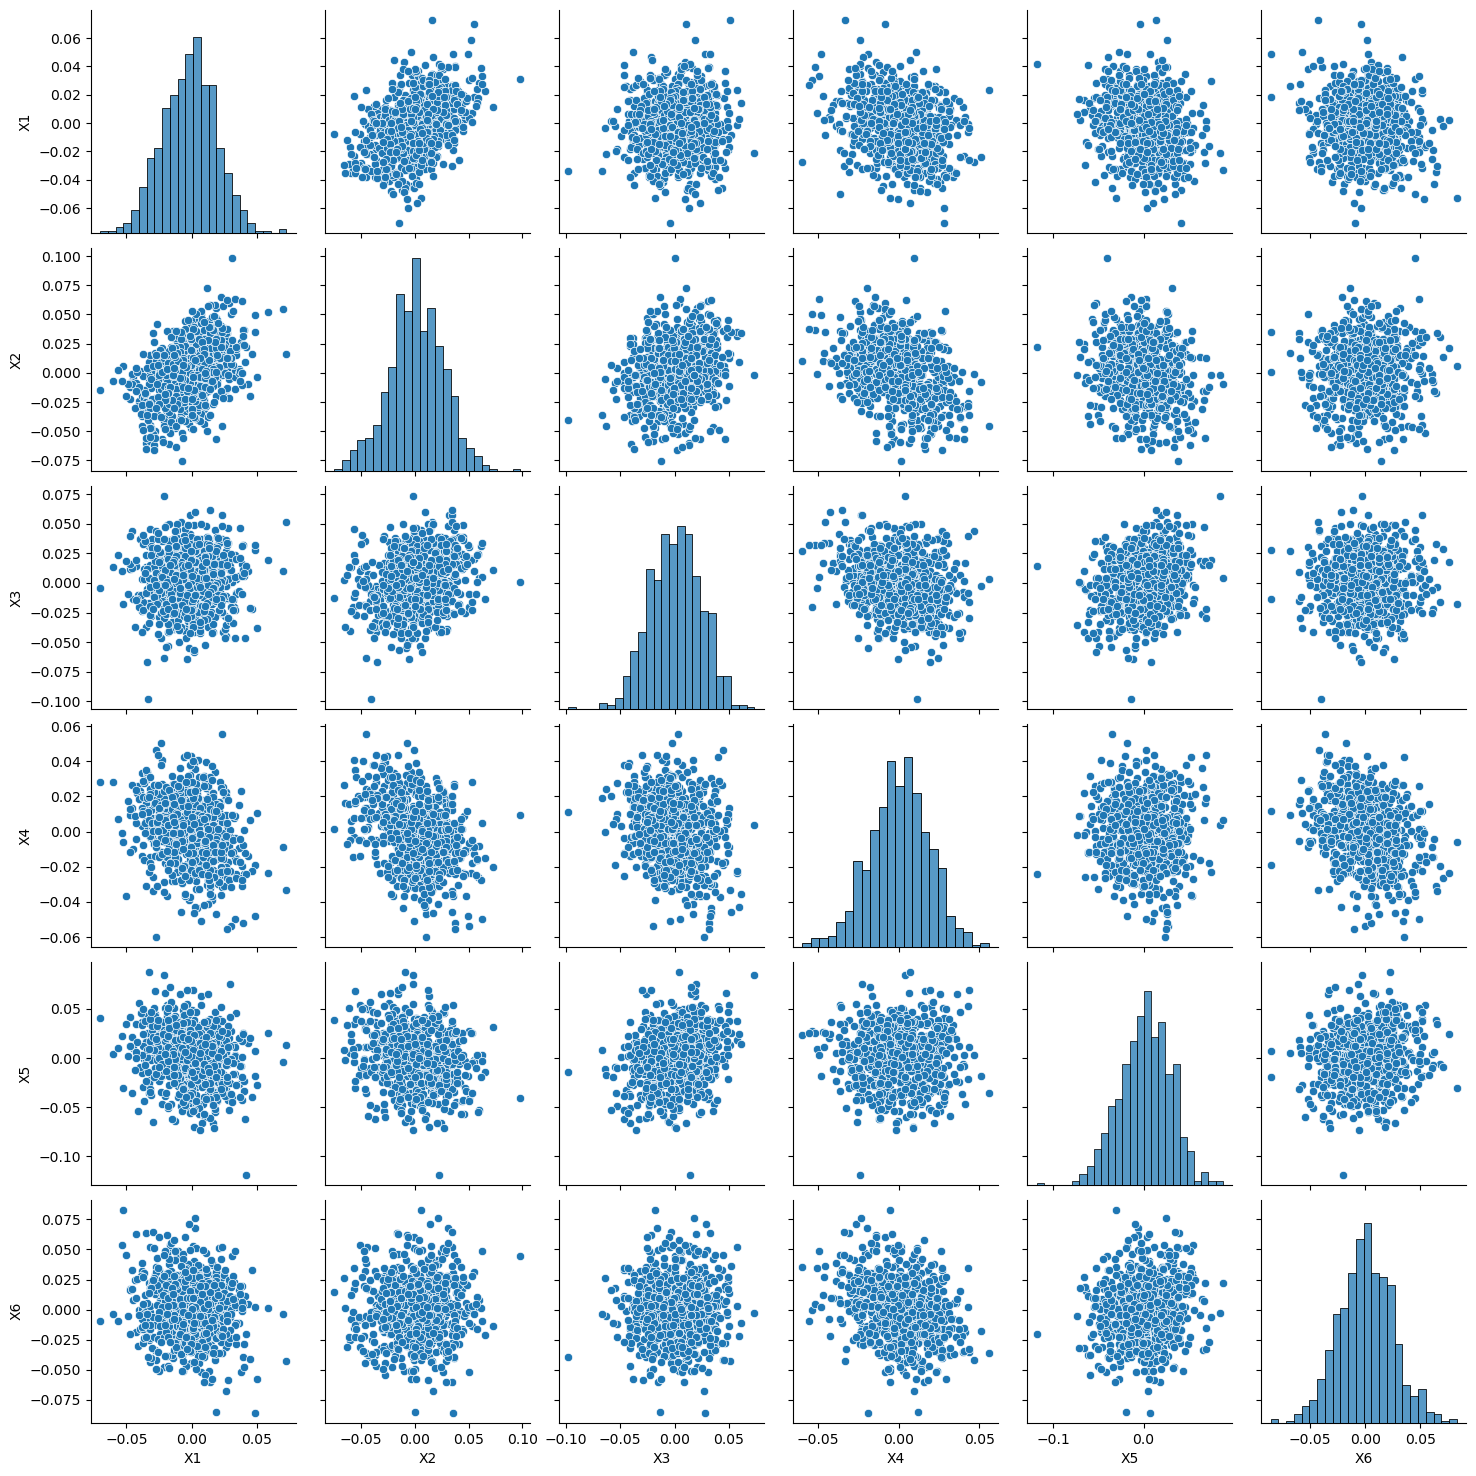

In [ ]:
# pairplot checks for collinearity and homoscedasticity
# show relationships between two featurs
import seaborn as sns

sns.pairplot(X_train);

## Independence

* Check out Mixed Models for non-independence

In [ ]:
# https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Hypothesis-Tests/Chi-Square-Tests/Chi-Square-Independence-Test/index.html
# check correlation
import numpy as np

corrs = X_train.corr().abs()
# s = corrs.unstack()
# s.sort_values(kind="quicksort")
# print (np.triu(np.ones(corrs.shape)).astype(bool))
corrs = corrs.where(np.triu(np.ones(corrs.shape)).astype(bool))
corrs = corrs.stack().reset_index()
corrs.columns = ['Row','Column','Corr']
corrs = corrs[corrs['Row'] != corrs['Column']]
print(corrs)

   Row Column      Corr
1   X1     X2  0.439908
2   X1     X3  0.028678
3   X1     X4  0.271449
4   X1     X5  0.206829
5   X1     X6  0.141277
7   X2     X3  0.251903
8   X2     X4  0.352305
9   X2     X5  0.189128
10  X2     X6  0.048625
12  X3     X4  0.229015
13  X3     X5  0.232215
14  X3     X6  0.020461
16  X4     X5  0.017748
17  X4     X6  0.274299
19  X5     X6  0.113183


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train.copy(deep=True)
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
X.drop('const', axis=1, inplace=True)
vif = vif.iloc[1: , :]
vif

,Variable,VIF
1,X1,1.372798
2,X2,1.469319
3,X3,1.207430
4,X4,1.332117
5,X5,1.167066
6,X6,1.160133


## Skewness and Kurtosis

In [ ]:
# create model
import statsmodels.api as sm

X_skews = X_train.copy(deep=True)
X_skews.insert(0, 'const', 1)
model = sm.OLS(y_train, X_skews).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.075e+31
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:31:28   Log-Likelihood:                 23430.
No. Observations:                 750   AIC:                        -4.685e+04
Df Residuals:                     743   BIC:                        -4.681e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.669e-15   2.43e-16      6.878      0.000    1.19e-15    2.15e-15
X1           1.11e-13   1.38e-14      8.029      0.000    8.39e-14    1.38e-13
X2            50.1497   1.16e-14   4.33e+15      0.000      50.150      50.150
X3          -2.28e-13   1.13e-14    -20.267      0.000    -2.5e-13   -2.06e-13
X4            64.6554    1.5e-14    4.3e+15      0.000      64.655      64.655
X5          1.704e-13   9.34e-15     18.241      0.000    1.52e-13    1.89e-13
X6            65.7453   1.05e-14   6.27e+15      0.000      65.745      65.745
==============================================================================
Omnibus:                        1.693   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.632
Skew:                          -0.044   Prob(JB):                        0.442
Kurtosis:                       2.789   Cond. No.                         70.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Diagnostic Scores for Regression Model Assumptions
These statistics help evaluate if the model's **residuals** (errors) meet the critical assumptions of **Normality** and **Independence**.

### I. Tests for Normality of Residuals (Shape of the Error Distribution)

The goal is to determine if the residuals follow a normal (bell-shaped) distribution.

| Statistic | Definition | Purpose |
| :--- | :--- | :--- |
| **Skewness** | Measures the **asymmetry** of the data distribution around its mean. | A value far from zero indicates the residuals are heavier on one side (e.g., positive skew means a long tail to the right). |
| **Kurtosis** | Measures the **"tailedness"** of the data distribution (how much the variance is due to outliers). | A high value (often $> 3$ in excess kurtosis) indicates many outliers, meaning the residuals have fatter tails than a normal distribution. |
| **Omnibus Test (D'Agostino's)** | A **combined statistical test** for the presence of both significant **skewness and kurtosis**. | Tests the null hypothesis that the residuals are normally distributed. |
| **Prob(Omnibus)** | The **p-value** of the Omnibus test. | If this value is **low** (e.g., $< 0.05$), you **reject** the null hypothesis and conclude the residuals are **not normally distributed**. |
| **Jarque-Bera Test** | Another common **combined statistical test** for skewness and kurtosis. | Similar to the Omnibus test, it checks the null hypothesis that the residuals are normally distributed. |
| **Prob(Jarque-Bera)** | The **p-value** of the Jarque-Bera test. | If this value is **low** (e.g., $< 0.05$), the normality assumption is likely **violated**. |

***

### II. Tests for Independence and Multicollinearity

These tests check other structural issues within the model's errors and predictors.

| Statistic | Definition | Purpose |
| :--- | :--- | :--- |
| **Durbin-Watson** | A test for **autocorrelation** (non-independence) of the errors. | A value near **2** suggests the errors are independent (ideal). Values significantly below 2 suggest positive autocorrelation (common in time series data). |
| **Cond No** (Condition Number) | A metric to detect **multicollinearity**. | A high value (e.g., $> 30$) suggests severe multicollinearity, meaning some predictor variables are highly correlated with each other, which can make the model coefficients unstable. |

##  Partial Regression Plot

A **Partial Regression Plot** is a diagnostic tool in **multiple linear regression** that graphically isolates the relationship between the **Dependent Variable ($y$)** and a single **Independent Variable ($X_i$)**, *after* statistically removing (or "partialling out") the effects of all other predictors in the model.

***

### Purpose and Interpretation

This plot helps assess the **unique contribution** and assumptions for one predictor at a time:

1.  **Unique Effect:** It reveals the **isolated influence** of $X_i$ on $y$, stripping away any variability $X_i$ shares with other predictors. The slope of the line in this plot is identical to the **estimated coefficient ($\beta_i$)** in the full regression model.
2.  **Model Diagnostics:** It is used to check for:
    * **Linearity:** Whether the remaining relationship appears straight, confirming the linear assumption.
    * **Outliers:** Identifying individual data points that are disproportionately influencing the estimation of $\beta_i$.

***

### How It Works (The "Partialling Out" Method)

The plot is created by displaying the results of two residual calculations:

1.  **Vertical Axis:** Residuals from regressing the **Dependent Variable ($y$)** on *all other* independent variables. (This is the part of $y$ *not* explained by the other predictors.)
2.  **Horizontal Axis:** Residuals from regressing the **Predictor of Interest ($X_i$)** on *all other* independent variables. (This is the part of $X_i$ *not* shared with the other predictors.)

By plotting these two sets of residuals, you visualize the pure, unconfounded relationship between $y$ and $X_i$.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


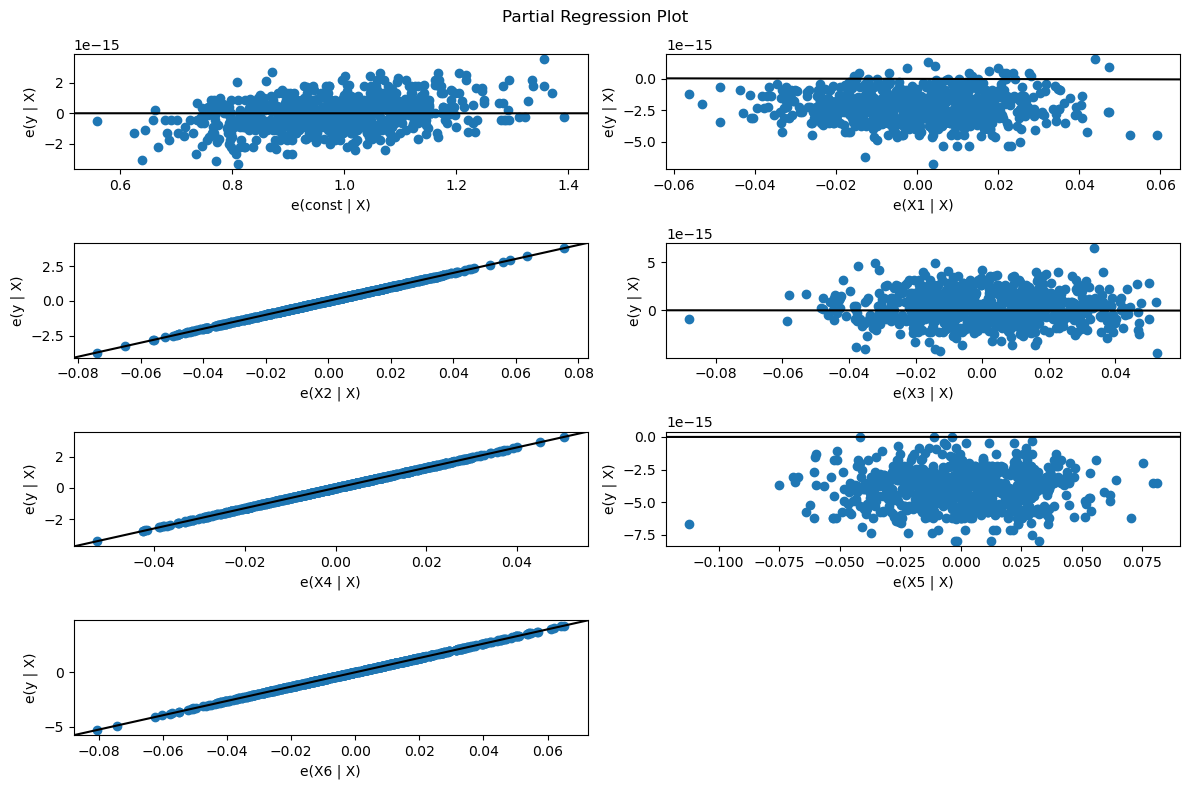

In [ ]:
# https://www.kirenz.com/post/2021-11-14-linear-regression-diagnostics-in-python/linear-regression-diagnostics-in-python/
# check for linearity and homoscedasticity
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.tight_layout()
plt.show()

## Patsy

* https://medium.com/@mummertm/using-patsy-for-statistical-modeling-189a9d9f5d27

## graphics.plot_regress_exog

This function produces four plots focused on a single predictor variable (regressor) to diagnose the model's fit, linearity, and assumption adherence concerning that specific variable.

***

### 1. Dependent Variable ($y$) and Fitted Values

* **Plot:** The **Dependent Variable ($y$)** and the **Fitted Regression Line** (predicted values) are plotted against the chosen **Independent Variable ($X_i$)**.
* **Key Feature:** The plot typically includes **prediction confidence intervals** (shaded areas) around the fitted line.
* **Purpose:** To visually assess the overall fit of the model and the predictive uncertainty *as a function of the chosen $X_i$*.

***

### 2. Residuals vs. Independent Variable

* **Plot:** The **Residuals** (errors, $e$) of the model are plotted against the chosen **Independent Variable ($X_i$)**.
* **Purpose:** This is the primary check for **Homoscedasticity** and **Linearity**.
    * **Ideal Result:** The points should be randomly scattered around the horizontal line at $y=0$ with no discernible pattern (i.e., the spread should be constant—Homoscedasticity).
    * **Violation:** A fan shape or clear curvature indicates a violation of assumptions.

***

### 3. Partial Regression Plot (Added Variable Plot)

* **Plot:** Shows the unique relationship between the dependent variable and the chosen $X_i$ **after the effects of all other predictors have been statistically removed**.
* **Purpose:** To check the **isolated contribution** of $X_i$ to the model, verify linearity for this specific predictor, and identify influential outliers.

***

### 4. CCPR Plot (Component and Component-Plus-Residual Plot)

* **Plot:** Plots the **Component** (the partial prediction for $y$ using only $X_i$) against $X_i$, and then adds the **Residuals** to this component.
* **Purpose:** This plot helps judge the **functional form** (linearity) of the relationship between the response ($y$) and the predictor ($X_i$) while taking other variables into account.
    * If the relationship is adequately modeled as linear, the points (Component-Plus-Residuals) should cluster closely around the component line. A sharp deviation suggests the need for a non-linear term (e.g., $X_i^2$).

eval_env: 1


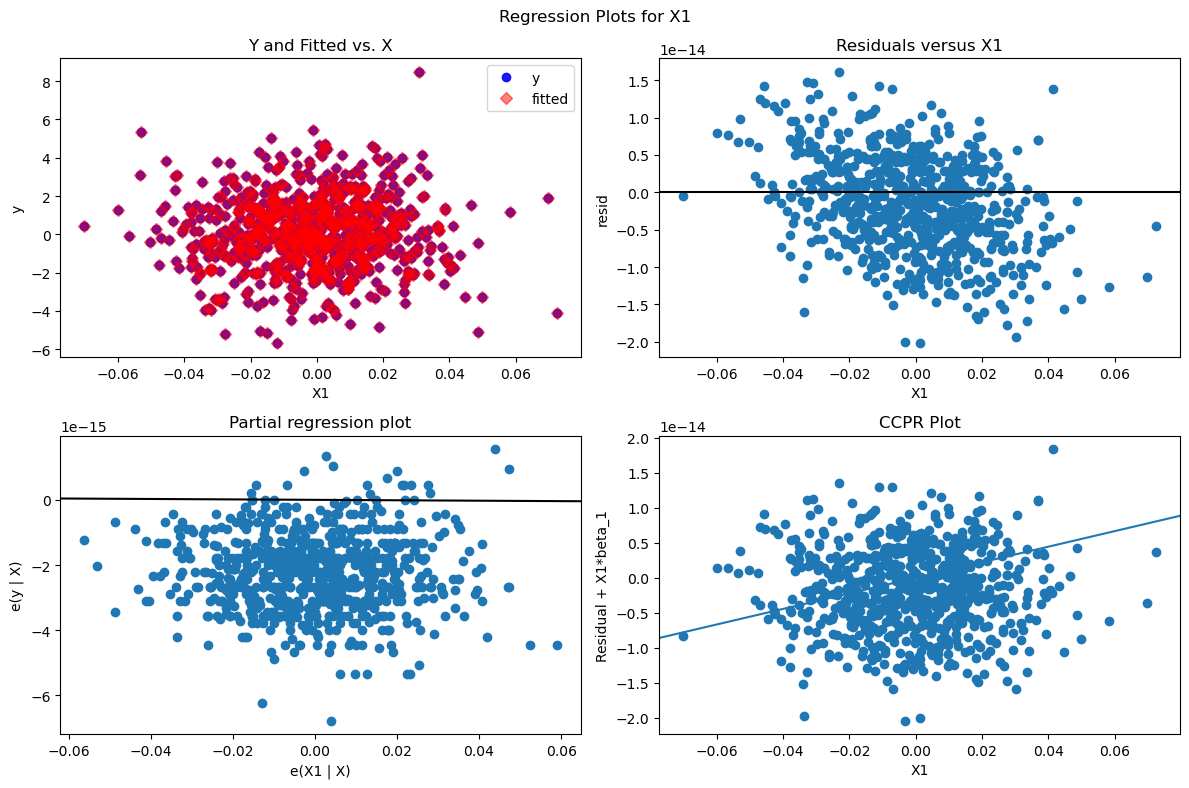

In [ ]:
# ccpr checks linear relationship with the dependent variable
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'X1', fig=fig)
plt.tight_layout();

## More on Normality Testing

https://towardsdatascience.com/normality-testing-the-graphical-way-20902abd8543